In [1]:
import sys
sys.path.append('..')

In [2]:
import os

def all_records_in(path):
    """Find all records in a record directory.
    The given directory must contain no other files!
    """
    return list(set([f.split('.')[0] for f in os.listdir(path)]))

In [3]:
conf = {
    "input_dir": "../data/noisy6",
#     "records": all_records_in("../data/noisy6"),
    "records": ["{}_em_6".format(num) for num in range(100,108)],
    "output_dir": "./generated/dropout",
    "save_annotations": False,
    "trigger_distance": 5,
    "save_model": False,
    "sampto": 10000,
    "verbose": False,
    "detectors": [
        {
            "type": "XiangDetector",
            "name": "XiangZeroDrop",
            "batch_size": 32,
            "window_size": 90,
            "detection_size": 30,
            "threshold": 0.9,
            "tolerance": 10,
            "aux_ratio": 5,
            "epochs": 3
        },
#         {
#             "type": "RXDetector",
#             "name": "RXHalfInputDrop",
#             "batch_size": 32,
#             "window_size": 90,
#             "detection_size": 30,
#             "input_dropout": 0.5,
#             "threshold": 0.9,
#             "tolerance": 10,
#             "aux_ratio": 5,
#             "epochs": 3
#         },
#         {
#             "type": "RXDetector",
#             "name": "RXHalfConvDrop",
#             "batch_size": 32,
#             "window_size": 90,
#             "detection_size": 30,
#             "conv_dropout": 0.5,
#             "threshold": 0.9,
#             "tolerance": 10,
#             "aux_ratio": 5,
#             "epochs": 3
#         },
#         { !!!
#             "type": "RXDetector",
#             "name": "RXQuarterInputDrop",
#             "batch_size": 32,
#             "window_size": 90,
#             "detection_size": 30,
#             "input_dropout": 0.25,
#             "threshold": 0.9,
#             "tolerance": 10,
#             "aux_ratio": 5,
#             "epochs": 3
#         },
#         {
#             "type": "RXDetector",
#             "name": "RXQuarterConvDrop",
#             "batch_size": 32,
#             "window_size": 90,
#             "detection_size": 30,
#             "conv_dropout": 0.25,
#             "threshold": 0.9,
#             "tolerance": 10,
#             "aux_ratio": 5,
#             "epochs": 3
#         },
        {
            "type": "RXDetector",
            "name": "RXQuarterInputAndConvDrop",
            "batch_size": 32,
            "window_size": 90,
            "detection_size": 30,
            "input_dropout": 0.25,
            "conv_dropout": 0.25,
            "threshold": 0.9,
            "tolerance": 10,
            "aux_ratio": 5,
            "epochs": 3
        },
        {
            "type": "RXDetector",
            "name": "RXHalfInputAndConvDrop",
            "batch_size": 32,
            "window_size": 90,
            "detection_size": 30,
            "input_dropout": 0.5,
            "conv_dropout": 0.5,
            "threshold": 0.9,
            "tolerance": 10,
            "aux_ratio": 5,
            "epochs": 3
        }
    ]
}

In [4]:
from raccoon.utils.builders import evaluator_from_dict

evaluator = evaluator_from_dict(conf)

Using TensorFlow backend.


In [5]:
reports = evaluator.loocv()

Epoch 1/3
2167/2167 [==============================] - 6s 3ms/step - loss: 0.0877
Epoch 2/3
2167/2167 [==============================] - 6s 3ms/step - loss: 0.0340
Epoch 3/3
2167/2167 [==============================] - 6s 3ms/step - loss: 0.0322
Epoch 1/3
2167/2167 [==============================] - 6s 3ms/step - loss: 0.0818
Epoch 2/3
Epoch 1/3
2167/2167 [==============================] - 6s 3ms/step - loss: 0.0325
Epoch 3/3
2167/2167 [==============================] - 7s 3ms/step - loss: 0.0311
Epoch 1/3
2167/2167 [==============================] - 7s 3ms/step - loss: 0.0624
Epoch 2/3

2167/2167 [==============================] - 7s 3ms/step - loss: 0.0240
Epoch 3/3
2167/2167 [==============================] - 8s 3ms/step - loss: 0.0239
Epoch 1/3
2167/2167 [==============================] - 7s 3ms/step - loss: 0.0821
Epoch 2/3
Epoch 1/3
2167/2167 [==============================] - 7s 3ms/step - loss: 0.0321
Epoch 3/3
2167/2167 [==============================] - 7s 3ms/step - loss: 0.

In [6]:
acc_reports = [report for report in reports if type(report['Test Record']) is list]
acc_reports

[OrderedDict([('ID', 0),
              ('Detector', 'XiangZeroDrop (XiangDetector)'),
              ('Train Records',
               ['101_em_6',
                '102_em_6',
                '103_em_6',
                '104_em_6',
                '105_em_6',
                '106_em_6',
                '107_em_6']),
              ('Test Record', ['100_em_6']),
              ('TP', 34),
              ('TN', 0),
              ('FP', 0),
              ('FN', 1),
              ('Sensitivity', 0.9714285714285714),
              ('PPV', 1.0),
              ('F1', 0.9855072463768116),
              ('Detection Runtime', 0.6237905025482178)]),
 OrderedDict([('ID', 1),
              ('Detector', 'XiangZeroDrop (XiangDetector)'),
              ('Train Records',
               ['100_em_6',
                '102_em_6',
                '103_em_6',
                '104_em_6',
                '105_em_6',
                '106_em_6',
                '107_em_6']),
              ('Test Record', ['101_em_6']

In [7]:
import numpy as np

metrics = ('Se', 'PPV', 'F1')
detectors = list(set([ar['Detector'] for ar in acc_reports]))

ses = [
    [ar['Sensitivity'] for ar in acc_reports if ar['Detector'] == detector]
    for detector in detectors]
ppvs = [
    [ar['PPV'] for ar in acc_reports if ar['Detector'] == detector]
    for detector in detectors]
f1s = [
    [ar['F1'] for ar in acc_reports if ar['Detector'] == detector]
    for detector in detectors]
    
means = np.array([np.nanmean(ses, axis=1), np.nanmean(ppvs, axis=1), np.nanmean(f1s, axis=1)]).T
stds = np.array([np.nanstd(ses, axis=1), np.nanstd(ppvs, axis=1), np.nanstd(f1s, axis=1)]).T

In [8]:
print(ppvs)

[[1.0, 1.0, 0.9411764705882353, 1.0, 0.7435897435897436, 1.0, 0.9117647058823529, 0.5892857142857143], [1.0, 1.0, 0.9411764705882353, 1.0, 0.9090909090909091, 1.0, 1.0, 0.7272727272727273], [1.0, 1.0, 0.675, 1.0, 0.8823529411764706, 1.0, 1.0, 0.9142857142857143]]


In [9]:
from scipy.stats import ttest_ind

print("Se : {}".format(ttest_ind(ses[0], ses[1], nan_policy='omit')))
print("PPV: {}".format(ttest_ind(ppvs[0], ppvs[1], nan_policy='omit')))
print("F1 : {}".format(ttest_ind(f1s[0], f1s[1], nan_policy='omit')))

Se : Ttest_indResult(statistic=0.008395627608751838, pvalue=0.9934198005374514)
PPV: Ttest_indResult(statistic=-0.7697365056854745, pvalue=0.4542486712446472)
F1 : Ttest_indResult(statistic=-0.6993349793914304, pvalue=0.4957984695234957)


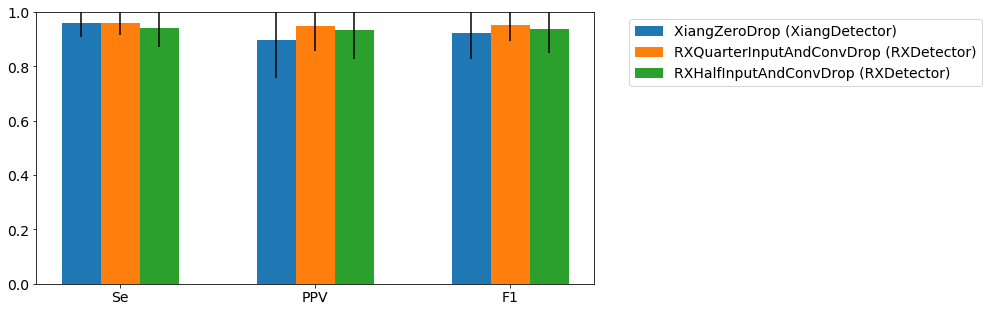

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

bar_width = 0.6 / len(detectors)
index = np.arange(3) # Se, PPV, F1

for ax_num, (detector, mean, std) in enumerate(zip(detectors, means, stds)):
    ax.bar(index+ax_num*bar_width, mean, bar_width, yerr=std, label=detector)

ax.set_xticks(index + 0.5*(len(detectors)-1)*bar_width)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)

ax.legend(bbox_to_anchor=(1.05, 1))

plt.show()